Look at ONC patrol data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import netCDF4 as nc
import seaborn as sns
import matplotlib.colors as mcolors
import glob
import os

from salishsea_tools import viz_tools

import ONC_patrols as onc


%matplotlib inline

/home/nsoontie/anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
sns.set_color_codes()

In [3]:
grid_B=nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
mesh_mask=nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/mesh_mask_SalishSea2.nc')

# All the data
Quick look at the data in each file.
* TS diagrams and locations

In [4]:
badQC=[0,3,4,9]

/ocean/nsoontie/MEOPAR/ONC/Patrols/BaynesSound_Patrol4_CTD_20150218T180311Z_20160301T214950Z-Corrected.csv
/ocean/nsoontie/MEOPAR/ONC/Patrols/Victoria_Patrol9_CTD_20150220T182104Z_20151001T195734Z-Corrected.csv
/ocean/nsoontie/MEOPAR/ONC/Patrols/GalianoIsland_Patrol9_CTD_20160303T211549Z_20160304T010923Z-Corrected.csv
/ocean/nsoontie/MEOPAR/ONC/Patrols/Lund_PowellRiver_Patrol1_CTD_20150216T164458Z_20151005T193255Z-Corrected.csv
/ocean/nsoontie/MEOPAR/ONC/Patrols/Lund_PowellRiver_Patrol2_CTD_20150215T162434Z_20151005T224706Z-Corrected.csv
/ocean/nsoontie/MEOPAR/ONC/Patrols/Irvine's_Sechelt_Patrol3_CTD_20150127T170859Z_20151005T213545Z-Corrected.csv
/ocean/nsoontie/MEOPAR/ONC/Patrols/Steveston_Patrol8_CTD_20150525T171143Z_20151005T222329Z-Corrected.csv
/ocean/nsoontie/MEOPAR/ONC/Patrols/Nanaimo_Qualicum_Patrol5_CTD_20150220T163040Z_20151005T204619Z-Corrected.csv
/ocean/nsoontie/MEOPAR/ONC/Patrols/CowichanBay_Patrol10_CTD_20150219T173033Z_20150916T181335Z-Corrected.csv


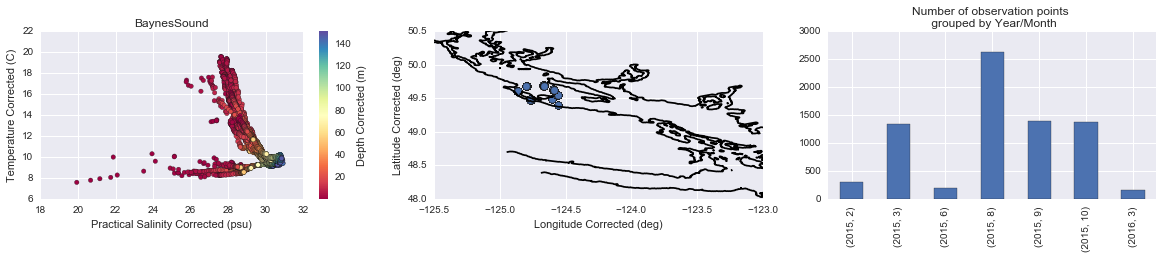

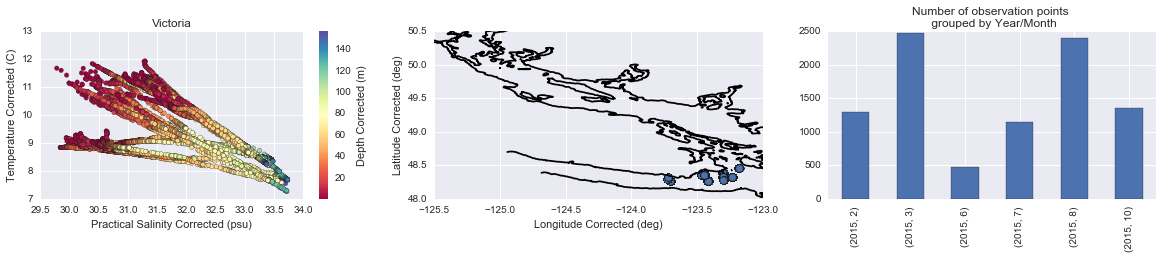

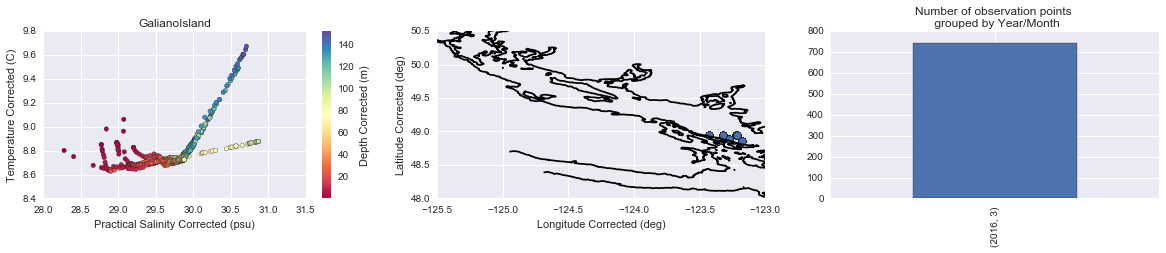

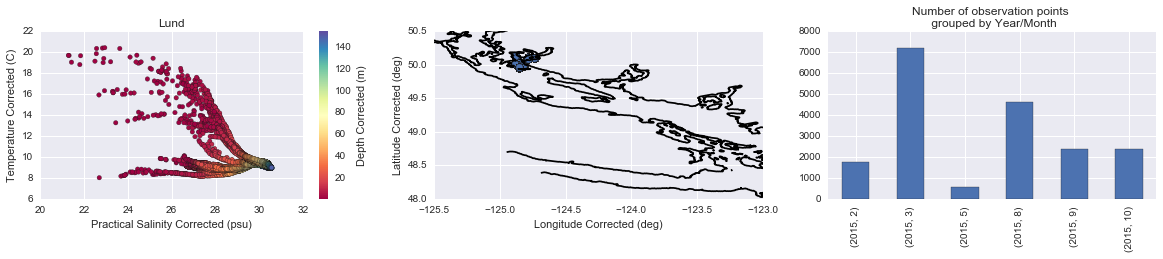

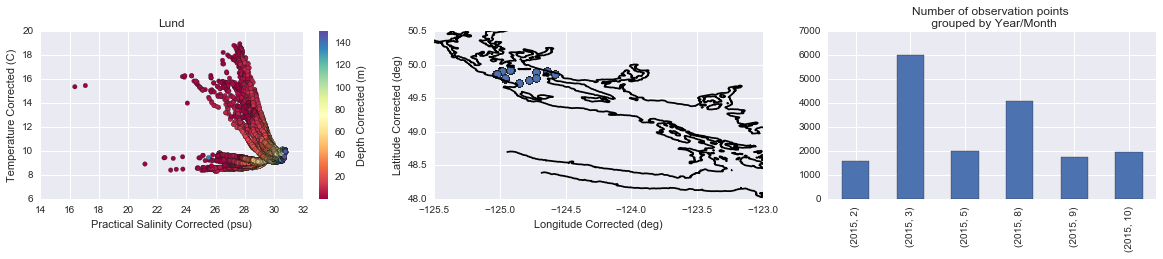

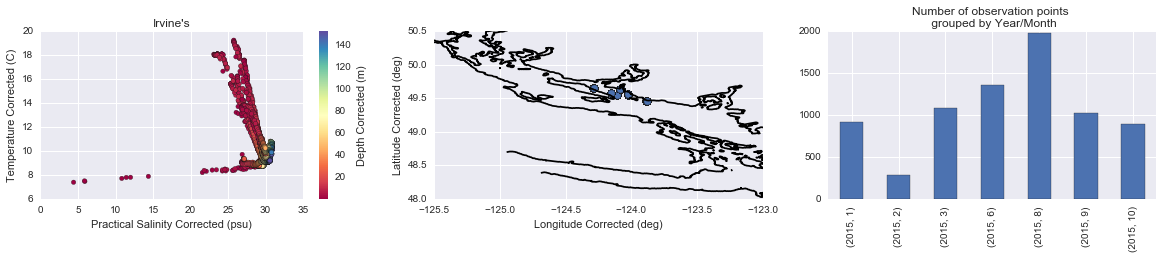

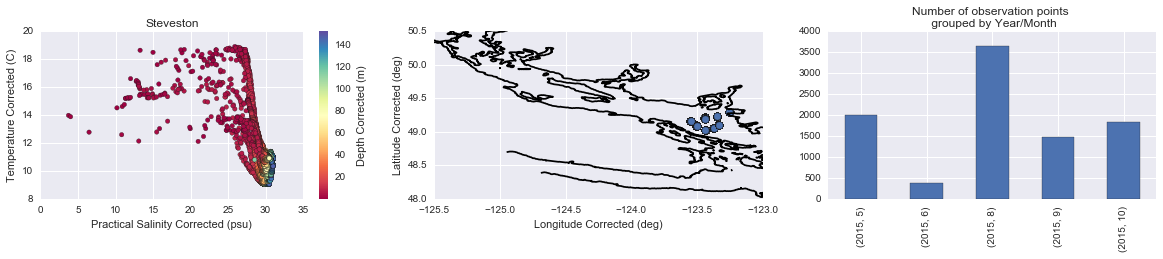

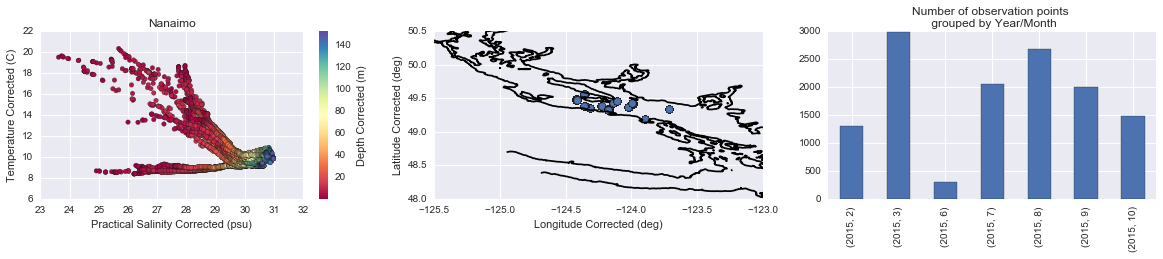

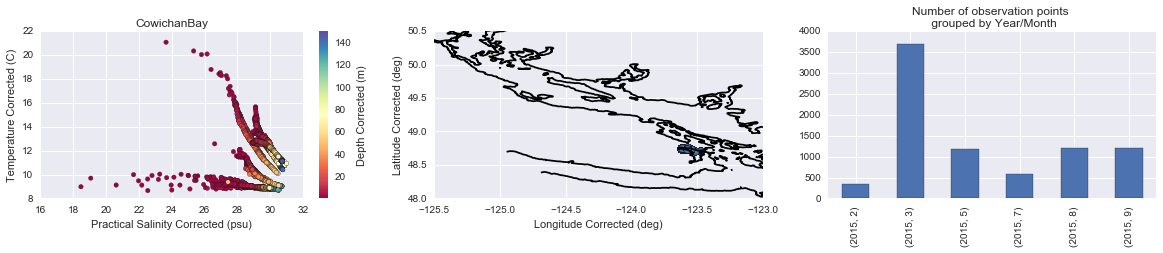

In [5]:
files = glob.glob('/ocean/nsoontie/MEOPAR/ONC/Patrols/*.csv')
for file in files:
    print(file)
    # process data
    data=onc.load_patrol_csv(file)
    data = onc.exclude_bad(data,['Practical Salinity Corrected QC Flag  '], badQC)
    # plot data
    title=os.path.basename(file).split('_')[0]
    fig,axs=plt.subplots(1,3, figsize=(20,3))
    ax=axs[0]
    mesh=data.plot(x='Practical Salinity Corrected (psu)', y='Temperature Corrected (C)',
                   c='Depth Corrected (m)',kind='scatter',ax=ax, cmap='Spectral')
    ax.set_title(title)
    ax=axs[1]
    data.plot(x='Longitude Corrected (deg)', y='Latitude Corrected (deg)',
              kind='scatter',ax=ax,s=50)
    viz_tools.plot_coastline(ax,grid_B,coords='map')
    ax.set_xlim([-125.5,-123])
    ax.set_ylim([48,50.5])
    
    ax=axs[2]
    dday=data['day']
    dday.groupby([dday.dt.year, dday.dt.month]).count().plot(kind="bar",ax=ax)
    ax.set_title('Number of observation points \n grouped by Year/Month')

# Victoria

In [6]:
csvfile = "/ocean/nsoontie/MEOPAR/ONC/Patrols/Victoria_Patrol9_CTD_20150220T182104Z_20151001T195734Z-Corrected.csv"
data=onc.load_patrol_csv(csvfile)
data = onc.exclude_bad(data,['Practical Salinity Corrected QC Flag  '], badQC)
data = onc.divide_into_casts(data)

No Model Point for -123.30147711249997 48.334551287500005
No Model Point for -123.30579209999999 48.33254605
No Model Point for -123.18295900000003 48.461194
No Model Point for -123.44497209090906 48.3592954090909


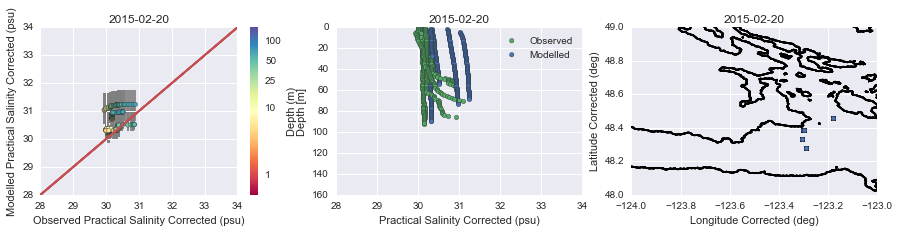

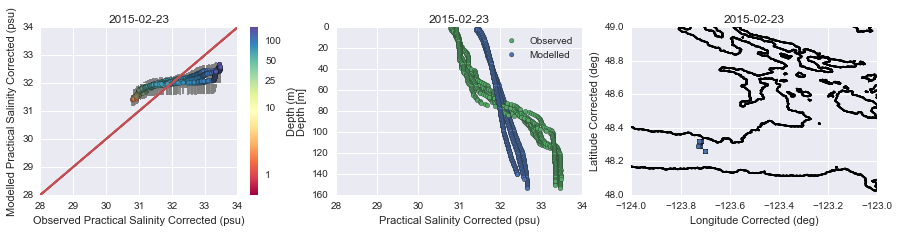

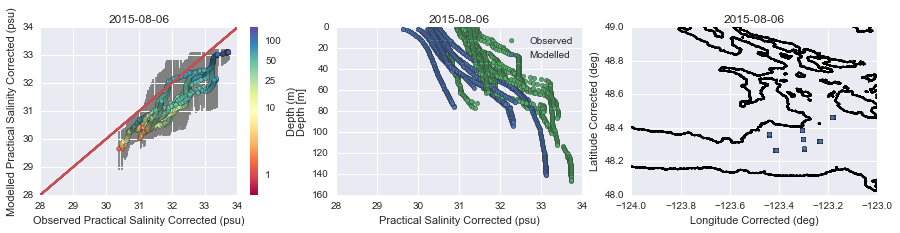

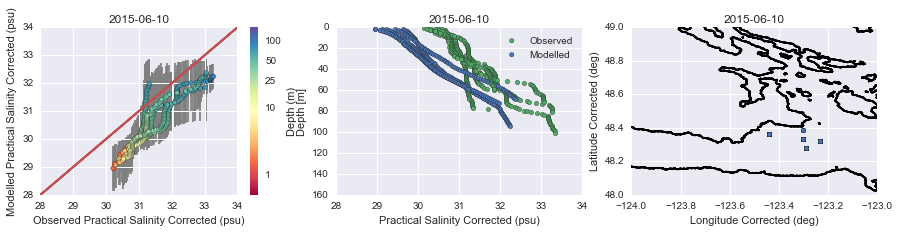

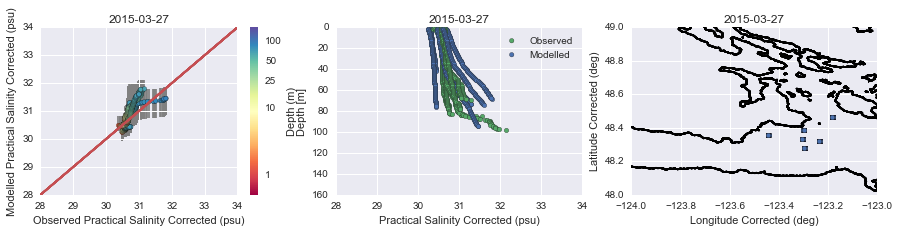

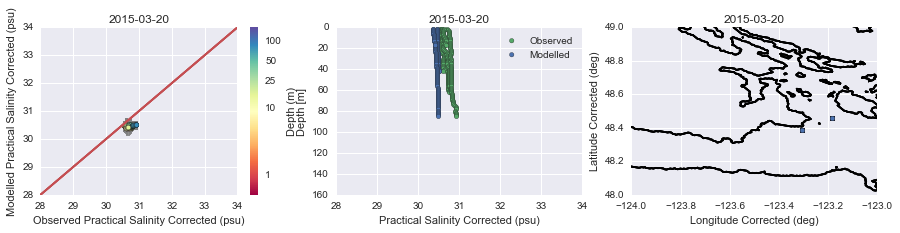

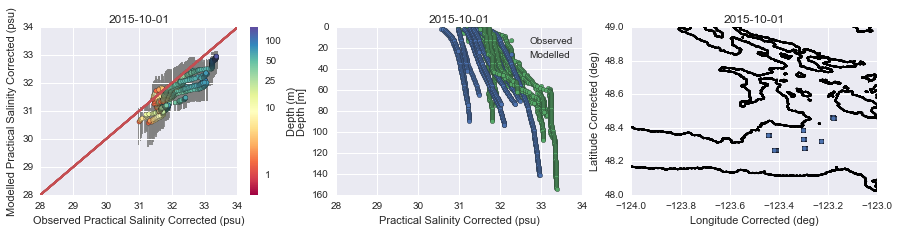

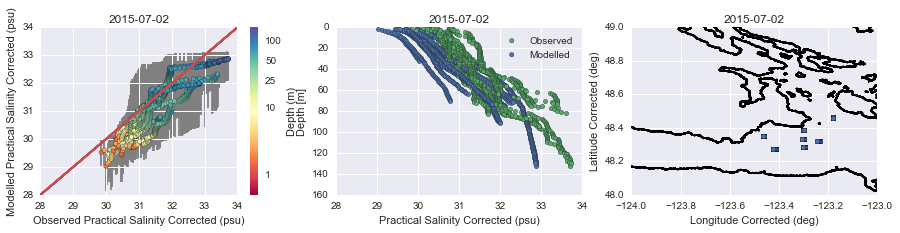

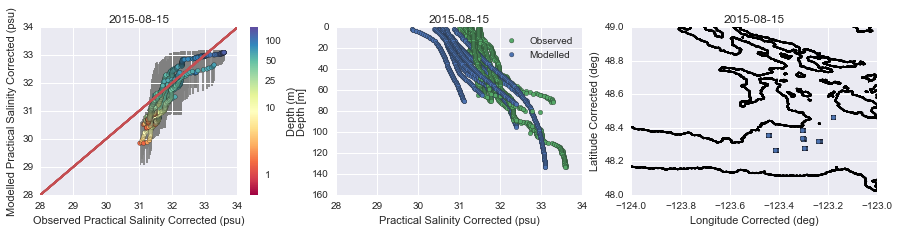

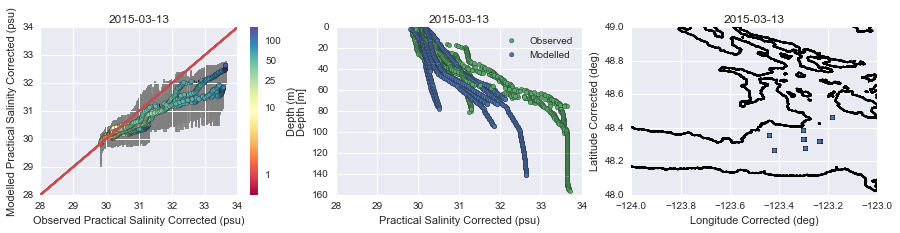

In [7]:
names={'obs': 'Practical Salinity Corrected (psu)',
       'model': 'vosaline'}
onc.compare_patrol_model_obs(data, names, grid_B, mesh_mask, var_lims=[28,34])

Do we have some kind of a seasonal bias?
* Surface is too fresh in the summer
* Deep is generally too fresh.
* March looks really good
* Feb is too salty in surface, too fresh at deep in the SJDF and too salty in Haro.

# Steveston

In [8]:
csvfile = "/ocean/nsoontie/MEOPAR/ONC/Patrols/Steveston_Patrol8_CTD_20150525T171143Z_20151005T222329Z-Corrected.csv"
data=onc.load_patrol_csv(csvfile)
data = onc.exclude_bad(data,['Practical Salinity Corrected QC Flag  '], badQC)
data = onc.divide_into_casts(data)

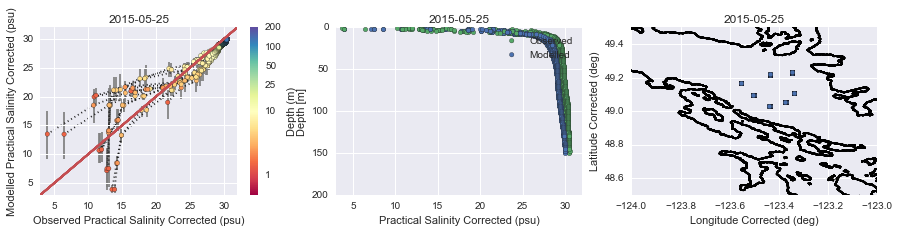

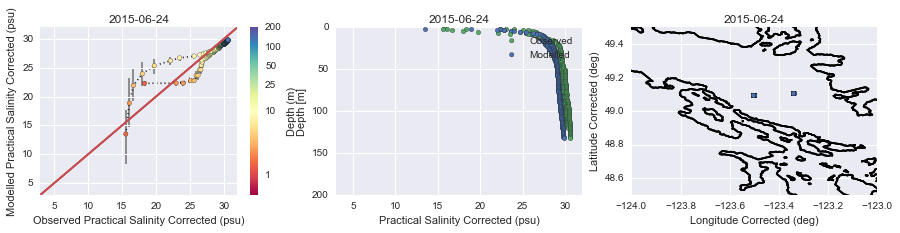

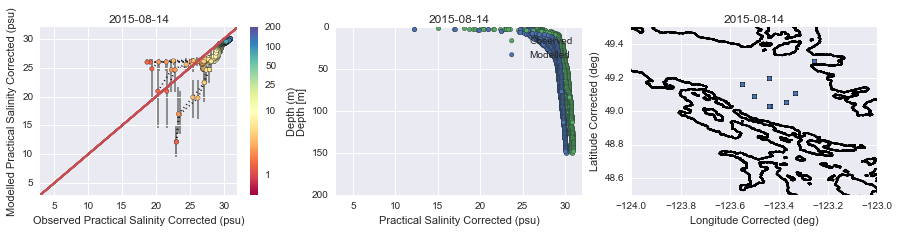

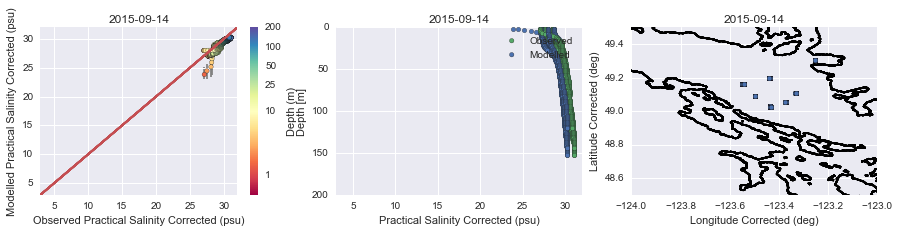

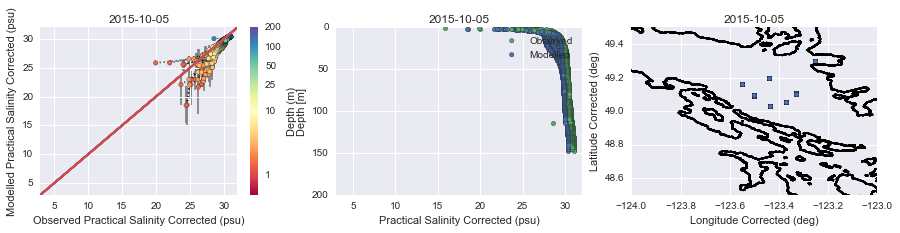

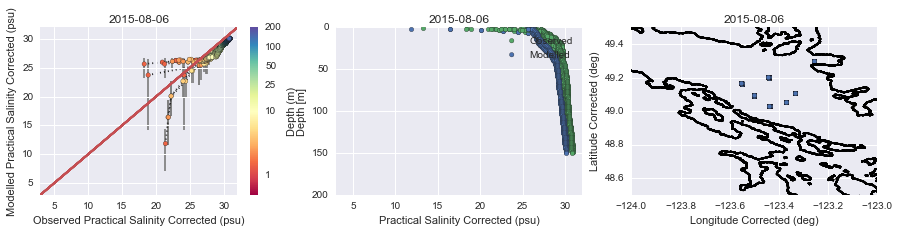

In [9]:
names={'obs': 'Practical Salinity Corrected (psu)',
       'model': 'vosaline'}
onc.compare_patrol_model_obs(data, names, grid_B, mesh_mask, var_lims=[3,32],
                            ylims=[48.5,49.5], depth_lims=[0,200])

# Galiano

In [10]:
csvfile ="/ocean/nsoontie/MEOPAR/ONC/Patrols/GalianoIsland_Patrol9_CTD_20160303T211549Z_20160304T010923Z-Corrected.csv"
data=onc.load_patrol_csv(csvfile)
data = onc.exclude_bad(data,['Practical Salinity Corrected QC Flag  '], badQC)
data = onc.divide_into_casts(data)

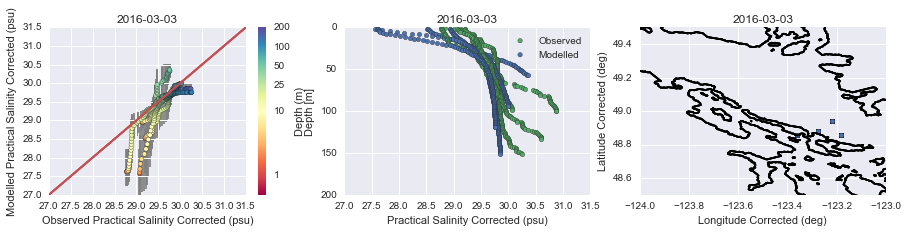

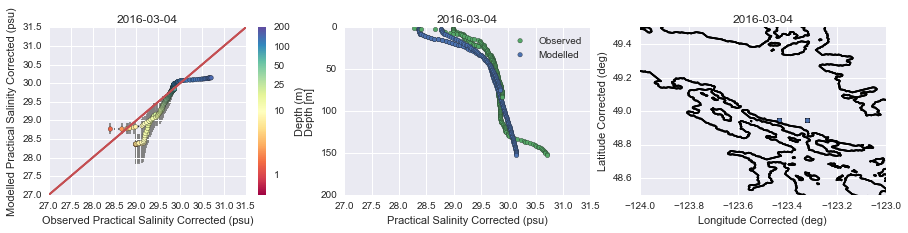

In [11]:
names={'obs': 'Practical Salinity Corrected (psu)',
       'model': 'vosaline'}
onc.compare_patrol_model_obs(data, names, grid_B, mesh_mask, var_lims=[27,31.5],
                            ylims=[48.5,49.5], depth_lims=[0,200])

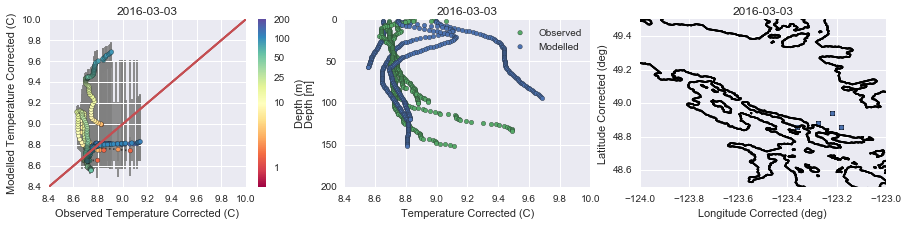

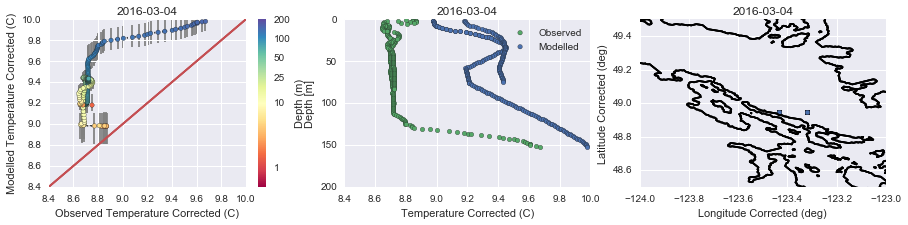

In [12]:
names={'obs': 'Temperature Corrected (C)',
       'model': 'votemper'}
onc.compare_patrol_model_obs(data, names, grid_B, mesh_mask, var_lims=[8.4,10],
                            ylims=[48.5,49.5], depth_lims=[0,200])

# Nanaimo

In [13]:
csvfile ="/ocean/nsoontie/MEOPAR/ONC/Patrols/Nanaimo_Qualicum_Patrol5_CTD_20150220T163040Z_20151005T204619Z-Corrected.csv"
data=onc.load_patrol_csv(csvfile)
data = onc.exclude_bad(data,['Practical Salinity Corrected QC Flag  '], badQC)
data = onc.divide_into_casts(data)

No Model Point for -124.35768553691273 49.38875197986576


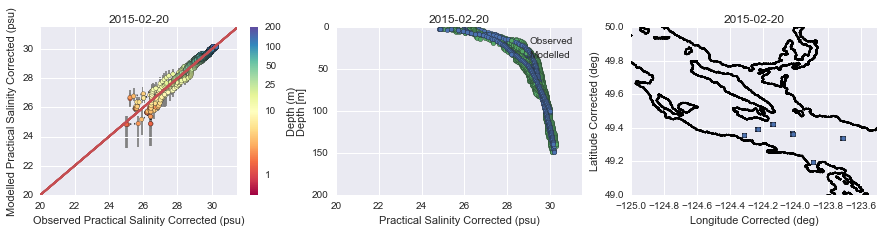

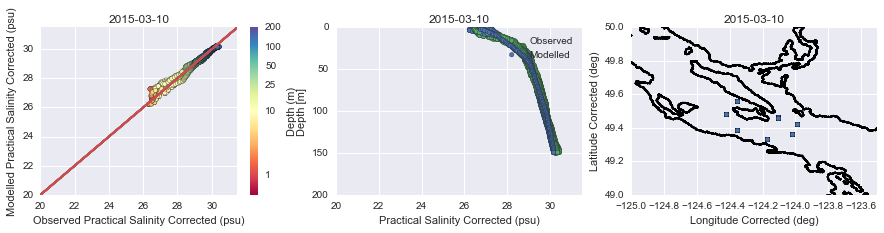

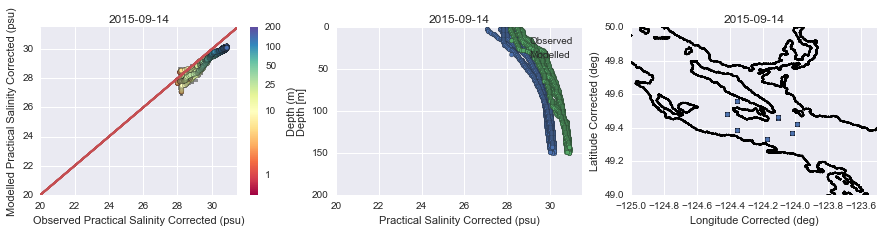

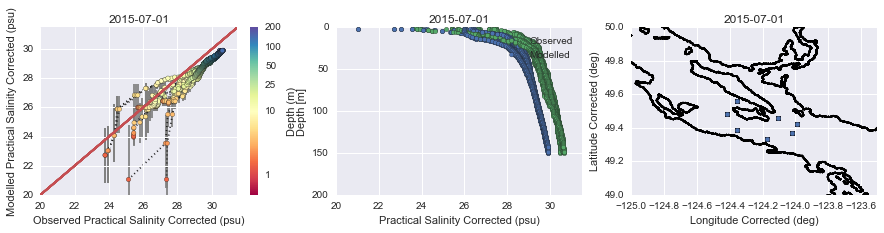

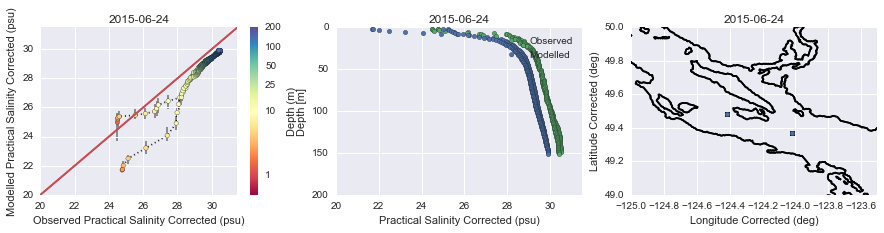

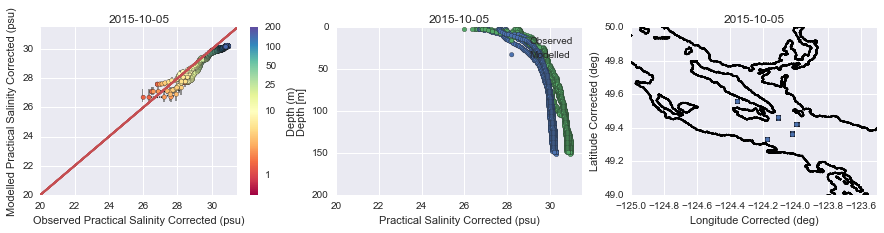

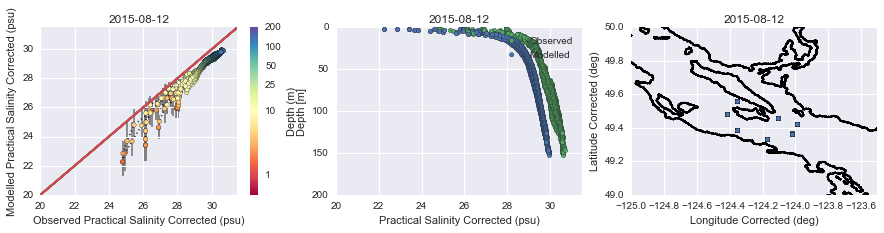

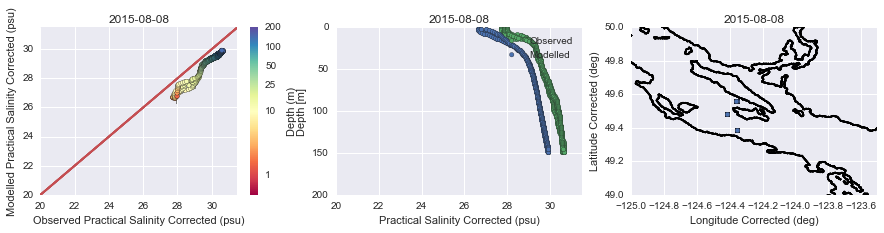

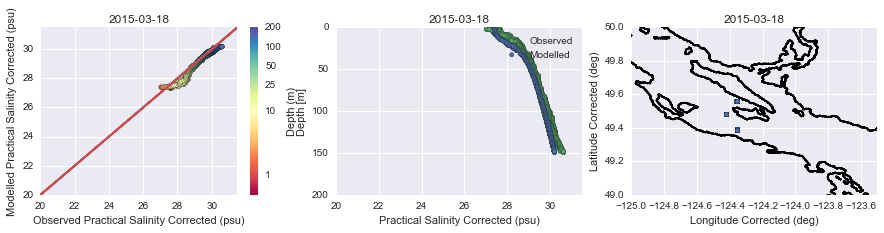

In [14]:
names={'obs': 'Practical Salinity Corrected (psu)',
       'model': 'vosaline'}
onc.compare_patrol_model_obs(data, names, grid_B, mesh_mask, var_lims=[20,31.5],xlims=[-125,-123.5],
                            ylims=[49,50], depth_lims=[0,200])

* Really good in the spring!!
* Generally too fresh in summer/fall, especially at depth but also sometimes in near the surface.

Why do all the observations cut off at 150 m? Is it the quality control flag? Check on Nanaimo.

In [15]:
csvfile ="/ocean/nsoontie/MEOPAR/ONC/Patrols/Nanaimo_Qualicum_Patrol5_CTD_20150220T163040Z_20151005T204619Z-Corrected.csv"
data=onc.load_patrol_csv(csvfile)

data_deep = data[data['Depth Corrected (m)'] >= 150]

In [16]:
data_deep

,time,Absolute Pressure Corrected (decibar),Absolute Pressure Corrected QC Flag,Conductivity Corrected (S/m),Conductivity Corrected QC Flag,Density Corrected (kg/m3),Density Corrected QC Flag,Depth Corrected (m),Depth Corrected QC Flag,Practical Salinity Corrected (psu),...,Pressure Corrected QC Flag,Sound Speed Corrected (m/s),Sound Speed Corrected QC Flag,Temperature Corrected (C),Temperature Corrected QC Flag,Latitude Corrected (deg),Latitude Corrected QC Flag,Longitude Corrected (deg),Longitude Corrected QC Flag,day
2275,2015-03-10 18:36:13.167,161.197520,7,3.300372,7,1024.063740,7,150.5,7,30.292559,...,7,1484.362157,7,9.393107,7,49.558100,0,-124.359000,0,2015-03-10
4957,2015-04-17 15:42:02.417,161.544803,0,3.275582,0,1024.100591,0,150.5,0,30.280722,...,0,1483.295202,0,9.107969,0,49.483101,0,-124.418906,0,2015-04-17
4958,2015-04-17 15:42:05.000,162.409578,0,3.276030,0,1024.107200,0,151.5,0,30.284290,...,0,1483.316664,0,9.108746,0,49.483100,0,-124.418902,0,2015-04-17
5985,2015-05-10 15:13:58.250,161.119660,0,3.296013,0,1024.232085,0,150.5,0,30.458965,...,0,1483.643125,0,9.144638,0,49.332700,0,-124.174100,0,2015-05-10
8263,2015-05-18 13:59:51.461,161.150325,0,3.288481,0,1024.278396,0,150.5,0,30.492424,...,0,1483.201755,0,9.014991,0,49.366403,0,-124.023403,0,2015-05-18
8734,2015-05-18 15:22:49.712,161.420705,0,3.277983,0,1024.167935,0,150.5,0,30.355958,...,0,1483.163598,0,9.048451,0,49.459901,0,-124.108301,0,2015-05-18
8885,2015-05-18 15:31:13.750,161.260371,0,3.276748,0,1024.158875,0,150.5,0,30.344924,...,0,1483.140548,0,9.046604,0,49.459501,0,-124.108601,0,2015-05-18
9185,2015-05-18 19:01:16.625,161.144983,0,3.283757,0,1024.166830,0,150.5,0,30.367304,...,0,1483.383081,0,9.104833,0,49.557603,0,-124.357007,0,2015-05-18
9336,2015-05-18 20:07:48.750,161.140628,0,3.297393,0,1024.217799,0,150.5,0,30.446702,...,0,1483.743502,0,9.175588,0,49.388200,0,-124.357301,0,2015-05-18
11146,2015-05-23 18:25:59.533,161.540506,0,3.284769,0,1024.186137,0,150.5,0,30.387421,...,0,1483.370877,0,9.093190,0,49.558599,0,-124.358500,0,2015-05-23


Maybe the data collectors didn't want anything deeper than 150m?